In [1]:
!pip install pandas

In [3]:
!pip install numpy

In [5]:
#importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
clientes = pd.read_csv('EcommerceCustomers')

In [13]:
clientes.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [11]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [16]:
clientes.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

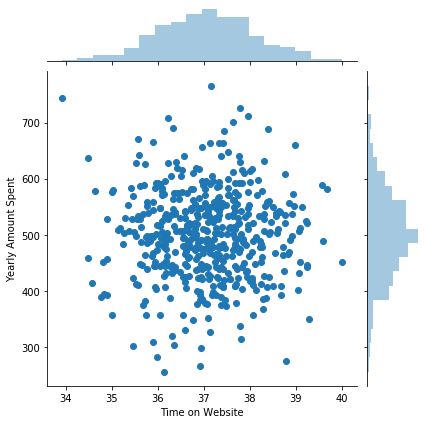

In [18]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=clientes)

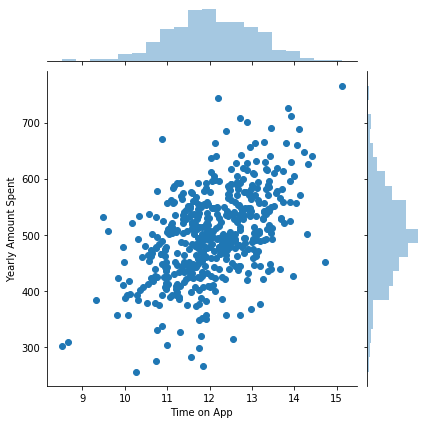

In [20]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=clientes)

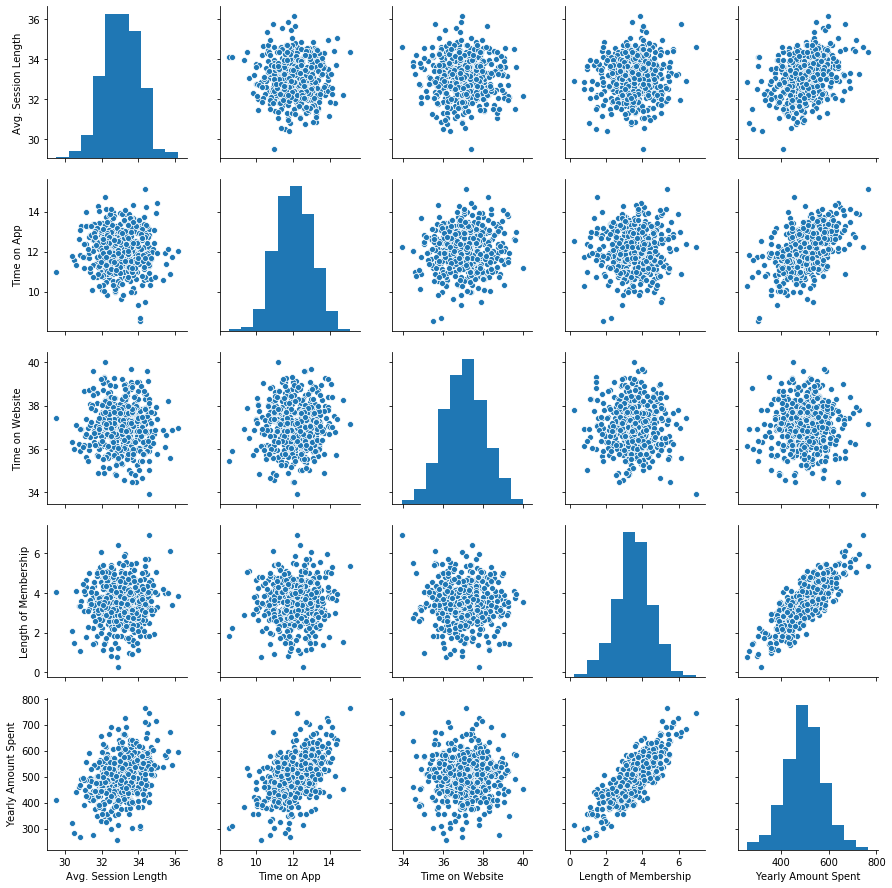

In [22]:
sns.pairplot(clientes)

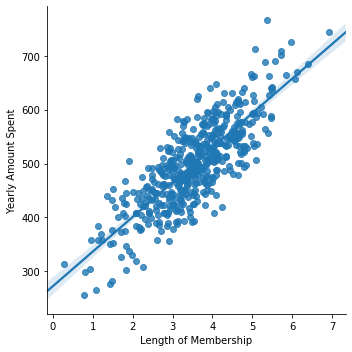

In [25]:
sns.lmplot('Length of Membership', 'Yearly Amount Spent', data=clientes)

In [26]:
clientes.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [28]:
X = clientes[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [30]:
y = clientes['Yearly Amount Spent']

In [31]:
from sklearn.model_selection import train_test_split

In [37]:
# divisão dos dados de treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
#instaciou
regressao_linear_clientes = LinearRegression()

In [40]:
#treinamento
regressao_linear_clientes.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print('coeficientes', regressao_linear_clientes.coef_, ' intercept_', regressao_linear_clientes.intercept_)

coeficientes [25.65786701 38.56896723  0.34822555 61.48473709]  intercept_ -1044.3075623887335


In [45]:
#Previsão dos dados de teste
predicoes = regressao_linear_clientes.predict(X_test)

In [51]:
plt.scatter(y_test, predicoes)
plt.xlabel('Real Y de Teste')
plt.ylabel('Predicao')

Text(0, 0.5, 'Predicao')

In [52]:
from sklearn import metrics

In [54]:
print('Mean absolute error (erro absoluto médio) (MAE) ', metrics.mean_absolute_error(y_test, predicoes))


Mean absolute error (erro absoluto médio) (MAE)  7.724383337471752


In [56]:
print('Mean Squared Error (erro médio quadrático) (MSE)', metrics.mean_squared_error(y_test, predicoes))

Mean Squared Error (erro médio quadrático) (MSE) 92.37589475067487


In [58]:
import math
print('Root Mean Squared Error (raiz do erro quadrático médio) (RMSE)', math.sqrt(metrics.mean_squared_error(y_test, predicoes)))

Root Mean Squared Error (raiz do erro quadrático médio) (RMSE) 9.611237940591986


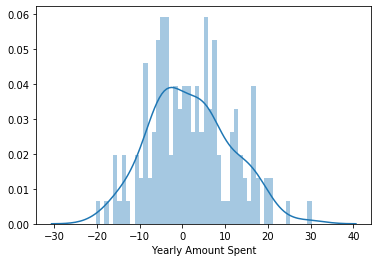

In [63]:
sns.distplot((y_test-predicoes), bins=50)

In [69]:
coeficientes = pd.DataFrame(regressao_linear_clientes.coef_, X_train.columns)
coeficientes.columns=['Coeficientes']
coeficientes

Coeficientes
Avg. Session Length      25.657867
Time on App              38.568967
Time on Website           0.348226
Length of Membership     61.484737

In [74]:
X_producao=X_train
y_producao=y_train
#guarda X_producao e y_producao

In [ ]:
#ler o dataset de producao X_producao e y_producao

In [77]:
#Aplicacao
regressao_linear_clientes_producao = LinearRegression()
regressao_linear_clientes_producao.fit(X_producao, y_producao)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# a cada chamada do cliente
# formulario
#X_producao 
#regressao_linear_clientes_producao.predict(X_producao)